In [60]:
# !pip install pandas-datareader

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [62]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721034,72.776613,71.466827,72.716087,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.941343,72.771760,71.783977,72.009132,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.127851,72.621631,70.876060,72.582893,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.592594,72.849224,72.021231,72.241547,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.943759,73.706279,71.943759,73.403648,132079200,0.0,0.0


## Get the Balance Sheet and Income Statements

In [63]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   

In [111]:
apple = yf.Ticker("AAPL")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", "AAPL", "GOOGL", "MSFT", "TSLA", "AMZN", "NVDA"]

price_data = {}
for ticker in tickers:
    data = yf.Ticker(ticker).history(start="2020-01-01", end=end_date)
    price_data[ticker] = data['Close']

df = pd.DataFrame(price_data)

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [110]:
print(META.Close.mean())
META.describe()

299.9754137693176


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,299.811909,304.029697,295.797742,299.975414,2.315541e+07,0.001591,0.0
std,124.745251,125.702634,123.419958,124.602583,1.572882e+07,0.028172,0.0
min,89.657445,90.035660,87.676774,88.492935,4.726100e+06,0.000000,0.0
25%,207.860358,210.607418,205.541276,208.795944,1.453120e+07,0.000000,0.0
50%,277.850462,283.892024,274.983974,279.512634,1.938320e+07,0.000000,0.0
75%,345.003967,350.448357,341.570169,344.665588,2.711680e+07,0.000000,0.0
max,630.430133,637.318434,626.147422,631.608093,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [112]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,300.291595
2020-01-03 00:00:00-05:00,298.017761
2020-01-06 00:00:00-05:00,299.154633
2020-01-07 00:00:00-05:00,298.313538
2020-01-08 00:00:00-05:00,299.903412
...,...
2024-12-23 00:00:00-05:00,592.906433
2024-12-24 00:00:00-05:00,599.496582
2024-12-26 00:00:00-05:00,599.536499


In [113]:
df = pd.DataFrame({
    'Market': SPY,
    'AAPL': AAPL,
    'AAL': AAL,
    'NFLX': NFLX,
    'META': META,
    'ZM': ZM,
    'GOOGL': GOOGL,
    'MSFT': MSFT,
    'TSLA': TSLA,
    'AMZN': AMZN,
    'NVDA': NVDA
  })

df.tail()

,Market,AAPL,AAL,NFLX,META,ZM,GOOGL,MSFT,TSLA,AMZN,NVDA
Date,,,,,,,,,,,
2024-12-23 00:00:00-05:00,592.906433,254.989655,17.250000,911.450012,599.316772,85.269997,194.406113,434.379028,430.600006,225.059998,139.657150
2024-12-24 00:00:00-05:00,599.496582,257.916443,17.350000,932.119995,607.209778,85.669998,195.884399,438.450836,462.279999,229.050003,140.207108
2024-12-26 00:00:00-05:00,599.536499,258.735504,17.350000,924.140015,602.813660,85.440002,195.375000,437.233276,454.130005,227.050003,139.917130
2024-12-27 00:00:00-05:00,593.225464,255.309296,17.350000,907.549988,599.276855,83.820000,192.538254,429.668457,431.660004,223.750000,136.997391
2024-12-30 00:00:00-05:00,586.455811,251.923019,17.620001,900.429993,590.714417,82.730003,191.020004,423.979858,417.410004,221.300003,137.477356


In [105]:
# print(AAPL)
# print(AAPL.shift(1))

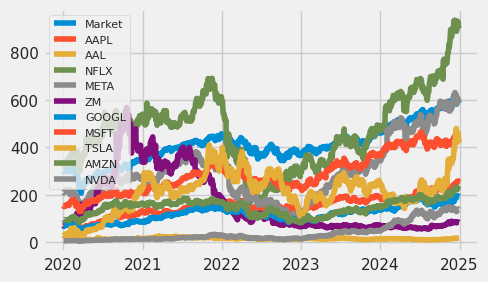

In [114]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [117]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(10)

,Market,AAPL,AAL,NFLX,META,ZM,GOOGL,MSFT,TSLA,AMZN,NVDA
Date,,,,,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009769,-0.050769,-0.011926,-0.005305,-0.021177,-0.005245,-0.012530,0.029203,-0.012213,-0.016135
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193,0.026305,0.002581,0.019072,0.014776,0.004185
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220,-0.001933,-0.009159,0.038067,0.002089,0.012034
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000,0.007092,0.015803,0.048033,-0.007839,0.001874
2020-01-09 00:00:00-05:00,0.006758,0.021018,0.003943,-0.010668,0.014210,0.000964,0.010443,0.012416,-0.022189,0.004788,0.010923
2020-01-10 00:00:00-05:00,-0.002882,0.002258,-0.022798,-0.019889,-0.001100,0.006451,0.006438,-0.004638,-0.006649,-0.009455,0.005335
2020-01-13 00:00:00-05:00,0.006854,0.021139,0.002559,0.029554,0.017502,0.012779,0.007717,0.011952,0.093207,0.004313,0.030871
2020-01-14 00:00:00-05:00,-0.001526,-0.013595,0.005098,-0.000679,-0.012926,-0.011822,-0.006577,-0.007068,0.024578,-0.011626,-0.018828


## Find the betas of the stocks. The formula is shown below:

In [118]:
beta_aapl = (data[['Market','AAPL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aapl

np.float64(1.1898314707982085)

### Calculate beta using regression line.

In [119]:
beta, alpha = np.polyfit(data['Market'], data['AAPL'], 1)
alpha
beta

np.float64(1.1898314707982098)

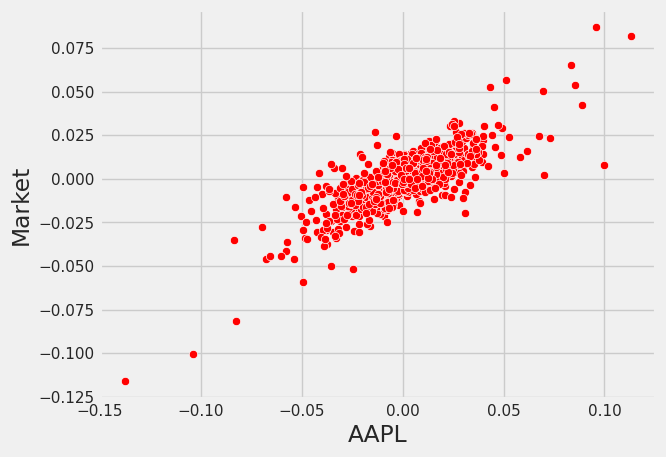

In [120]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'AAPL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='AAPL'>

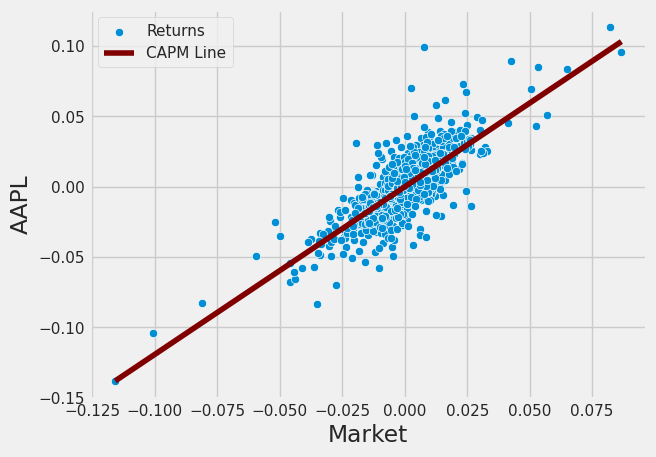

In [74]:
sns.scatterplot(y = 'AAPL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aapl, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [75]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAPL']].cov() *252
cov_aapl_market = cov.iloc[0,1]
cov_aapl_market
market_var = data['Market'].var()*252
market_var

AAPL_beta_annual = cov_aapl_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAPL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAPL_capm_return = rf + AAPL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1898314707982085
The annualized CAPM return of AAPL is 15.49%


In [76]:
sharperatio = (rm-rf)/(data['AAPL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.345


In [77]:
beta_aal = (data[['Market','AAL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aal

np.float64(1.4080134958469976)

In [78]:
beta, alpha = np.polyfit(data['Market'], data['AAL'], 1)
alpha
beta

np.float64(1.4080134958469994)

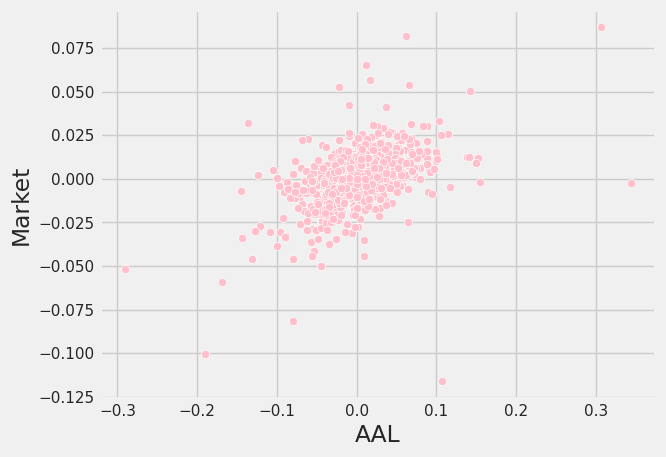

In [79]:
sns.scatterplot(y = 'Market', x = 'AAL', data = data, color = 'PINK')
plt.show()

<Axes: xlabel='Market', ylabel='AAL'>

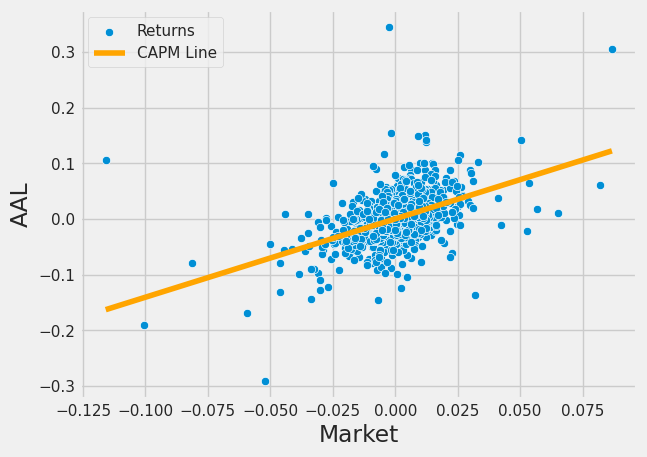

In [80]:
sns.scatterplot(y = 'AAL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aal, color = 'ORANGE', label = 'CAPM Line')

In [81]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAL']].cov() *252
cov_aal_market = cov.iloc[0,1]
cov_aal_market
market_var = data['Market'].var()*252
market_var

AAL_beta_annual = cov_aal_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAL_capm_return = rf + AAL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAL is {AAL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.4080134958469976
The annualized CAPM return of AAL is 17.87%


In [82]:
sharperatio = (rm-rf)/(data['AAL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.1782


In [83]:
beta_NFLX = (data[['Market','NFLX']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_NFLX

np.float64(1.0479747863018518)

In [84]:
beta, alpha = np.polyfit(data['Market'], data['NFLX'], 1)
alpha
beta

np.float64(1.047974786301852)

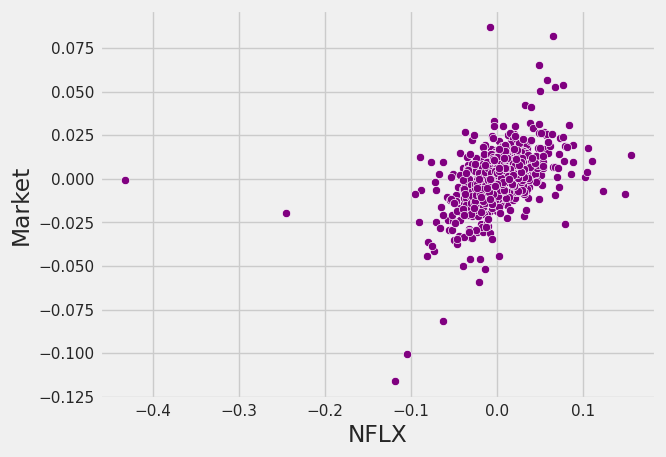

In [85]:
sns.scatterplot(y = 'Market', x = 'NFLX', data = data, color = 'PURPLE')
plt.show()

<Axes: xlabel='Market', ylabel='NFLX'>

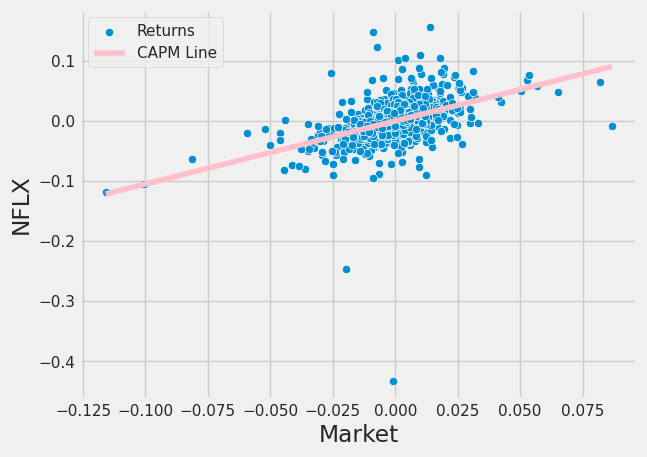

In [86]:
sns.scatterplot(y = 'NFLX', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_NFLX, color = 'PINK', label = 'CAPM Line')

In [87]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','NFLX']].cov() *252
cov_NFLX_market = cov.iloc[0,1]
cov_NFLX_market
market_var = data['Market'].var()*252
market_var

NFLX_beta_annual = cov_NFLX_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',NFLX_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
NFLX_capm_return = rf + NFLX_beta_annual*riskpremium

print(f"The annualized CAPM return of NFLX is {NFLX_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.0479747863018516
The annualized CAPM return of NFLX is 13.94%


In [88]:
sharperatio = (rm-rf)/(data['NFLX'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.233


In [89]:
beta_META = (data[['Market','META']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_META

np.float64(1.3291292364679421)

In [90]:
beta, alpha = np.polyfit(data['Market'], data['META'], 1)
alpha
beta

np.float64(1.329129236467943)

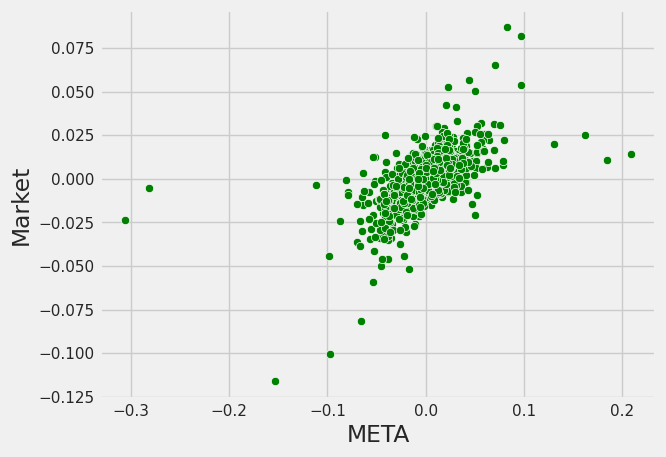

In [91]:
sns.scatterplot(y = 'Market', x = 'META', data = data, color = 'GREEN')
plt.show()

<Axes: xlabel='Market', ylabel='META'>

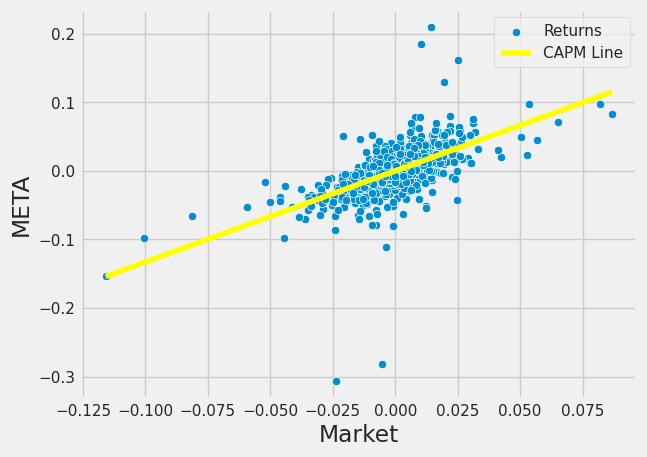

In [92]:
sns.scatterplot(y = 'META', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_META, color = 'YELLOW', label = 'CAPM Line')

In [93]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','META']].cov() *252
cov_META_market = cov.iloc[0,1]
cov_META_market
market_var = data['Market'].var()*252
market_var

META_beta_annual = cov_META_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',META_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
META_capm_return = rf + META_beta_annual*riskpremium

print(f"The annualized CAPM return of META is {META_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.3291292364679421
The annualized CAPM return of META is 17.01%


In [94]:
sharperatio = (rm-rf)/(data['META'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.2405


In [95]:
beta_ZM = (data[['Market','ZM']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_ZM

np.float64(0.6245569389601165)

In [96]:
beta, alpha = np.polyfit(data['Market'], data['ZM'], 1)
alpha
beta

np.float64(0.6245569389601165)

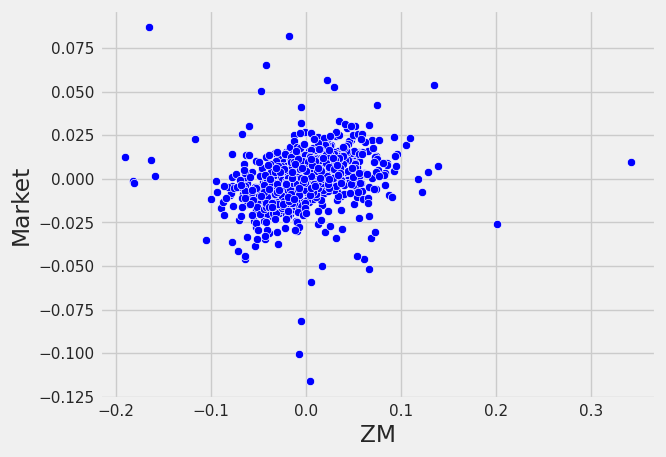

In [97]:
sns.scatterplot(y = 'Market', x = 'ZM', data = data, color = 'BLUE')
plt.show()

<Axes: xlabel='Market', ylabel='ZM'>

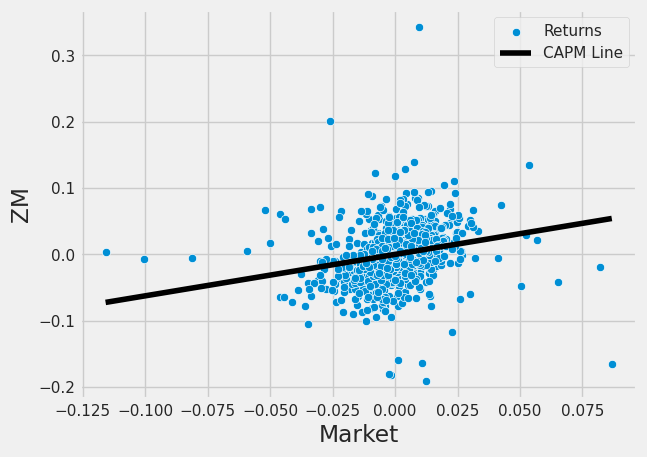

In [98]:
sns.scatterplot(y = 'ZM', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_ZM, color = 'BLACK', label = 'CAPM Line')

In [121]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','ZM']].cov() *252
cov_ZM_market = cov.iloc[0,1]
cov_ZM_market
market_var = data['Market'].var()*252
market_var

ZM_beta_annual = cov_ZM_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',ZM_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
ZM_capm_return = rf + ZM_beta_annual*riskpremium

print(f"The annualized CAPM return of ZM is {ZM_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 0.6245569389601165
The annualized CAPM return of ZM is 9.32%


In [100]:
sharperatio = (rm-rf)/(data['ZM'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.1928


In [122]:
beta_GOOGL = (data[['Market','ZM']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_GOOGL

np.float64(0.6245569389601165)

In [123]:
beta, alpha = np.polyfit(data['Market'], data['GOOGL'], 1)
alpha
beta

np.float64(1.1509583936682484)

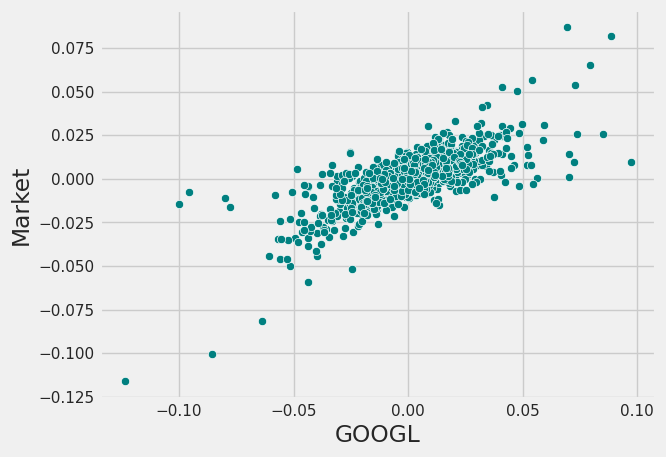

In [125]:
sns.scatterplot(y = 'Market', x = 'GOOGL', data = data, color = 'TEAL')
plt.show()

<Axes: xlabel='Market', ylabel='GOOGL'>

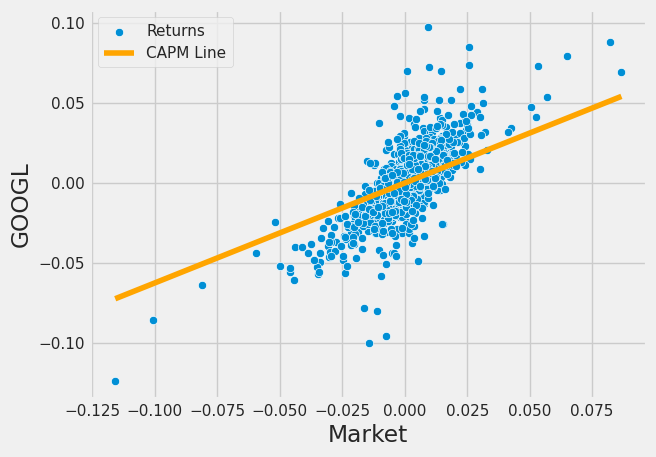

In [127]:
sns.scatterplot(y = 'GOOGL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_GOOGL, color = 'ORANGE', label = 'CAPM Line')

In [128]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','GOOGL']].cov() *252
cov_GOOGL_market = cov.iloc[0,1]
cov_GOOGL_market
market_var = data['Market'].var()*252
market_var

GOOGL_beta_annual = cov_GOOGL_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',GOOGL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
GOOGL_capm_return = rf + GOOGL_beta_annual*riskpremium

print(f"The annualized CAPM return of GOOGL is {GOOGL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1509583936682475
The annualized CAPM return of GOOGL is 15.07%


In [129]:
sharperatio = (rm-rf)/(data['GOOGL'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.3358


In [130]:
beta_MSFT = (data[['Market','MSFT']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_MSFT

np.float64(1.1875522658744493)

In [131]:
beta, alpha = np.polyfit(data['Market'], data['MSFT'], 1)
alpha
beta

np.float64(1.1875522658744504)

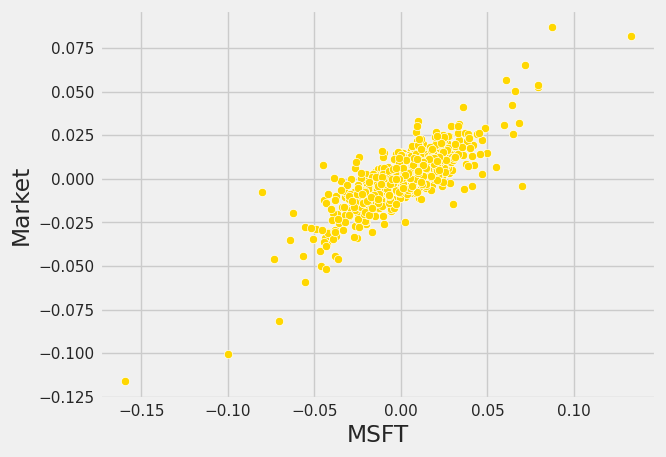

In [132]:
sns.scatterplot(y = 'Market', x = 'MSFT', data = data, color = 'GOLD')
plt.show()

<Axes: xlabel='Market', ylabel='MSFT'>

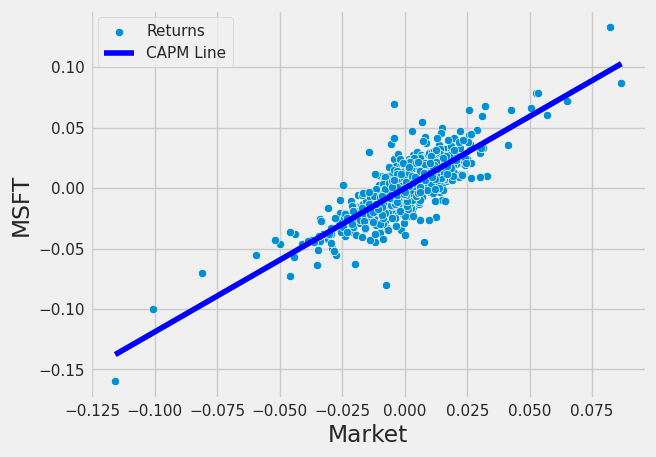

In [133]:
sns.scatterplot(y = 'MSFT', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_MSFT, color = 'BLUE', label = 'CAPM Line')

In [134]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','MSFT']].cov() *252
cov_MSFT_market = cov.iloc[0,1]
cov_MSFT_market
market_var = data['Market'].var()*252
market_var

MSFT_beta_annual = cov_MSFT_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',MSFT_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
MSFT_capm_return = rf + MSFT_beta_annual*riskpremium

print(f"The annualized CAPM return of MSFT is {MSFT_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1875522658744493
The annualized CAPM return of MSFT is 15.47%


In [143]:
sharperatio = (rm-rf)/(data['MSFT'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.3577


In [141]:
beta_TSLA = (data[['Market','TSLA']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_TSLA

np.float64(1.6257712684458687)

In [142]:
beta, alpha = np.polyfit(data['Market'], data['TSLA'], 1)
alpha
beta

np.float64(1.625771268445871)

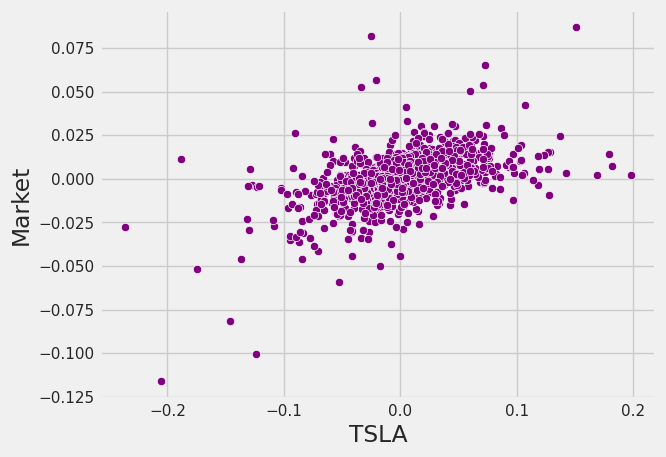

In [138]:
sns.scatterplot(y = 'Market', x = 'TSLA', data = data, color = 'PURPLE')
plt.show()

<Axes: xlabel='Market', ylabel='MSFT'>

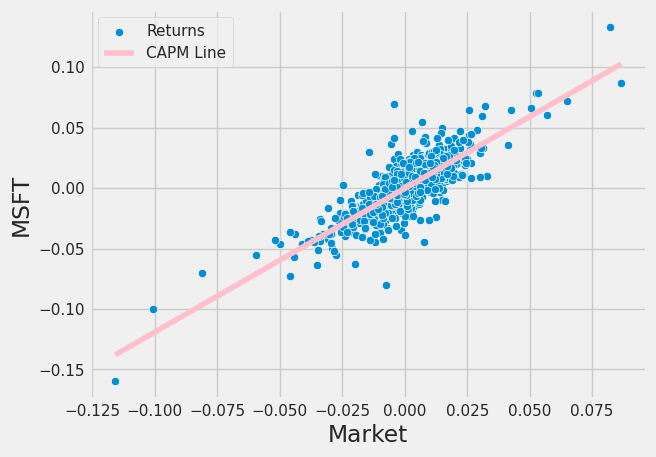

In [139]:
sns.scatterplot(y = 'MSFT', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_MSFT, color = 'PINK', label = 'CAPM Line')

In [140]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','TSLA']].cov() *252
cov_TSLA_market = cov.iloc[0,1]
cov_TSLA_market
market_var = data['Market'].var()*252
market_var

TSLA_beta_annual = cov_TSLA_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',TSLA_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
TSLA_capm_return = rf + TSLA_beta_annual*riskpremium

print(f"The annualized CAPM return of TSLA is {TSLA_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.625771268445869
The annualized CAPM return of TSLA is 20.25%


In [144]:
sharperatio = (rm-rf)/(data['TSLA'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.163


In [145]:
beta_AMZN = (data[['Market','AMZN']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_AMZN

np.float64(1.102926383646606)

In [146]:
beta, alpha = np.polyfit(data['Market'], data['AMZN'], 1)
alpha
beta

np.float64(1.1029263836466068)

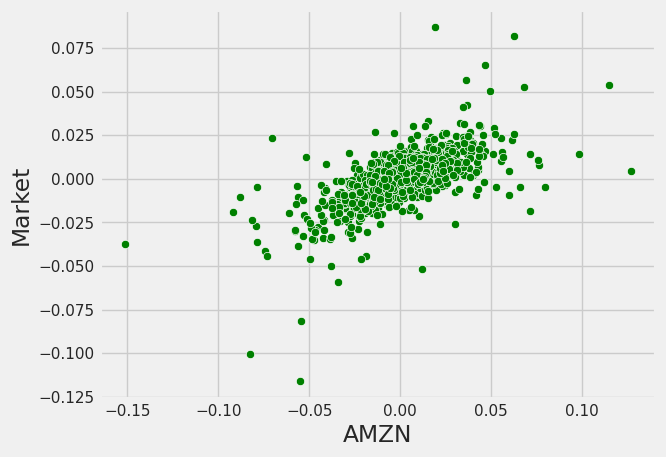

In [148]:
sns.scatterplot(y = 'Market', x = 'AMZN', data = data, color = 'GREEN')
plt.show()

<Axes: xlabel='Market', ylabel='AMZN'>

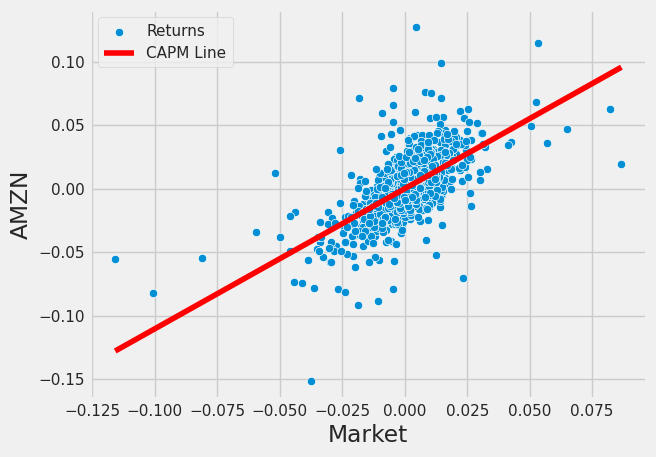

In [149]:
sns.scatterplot(y = 'AMZN', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_AMZN, color = 'RED', label = 'CAPM Line')

In [150]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AMZN']].cov() *252
cov_AMZN_market = cov.iloc[0,1]
cov_AMZN_market
market_var = data['Market'].var()*252
market_var

AMZN_beta_annual = cov_AMZN_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AMZN_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AMZN_capm_return = rf + AMZN_beta_annual*riskpremium

print(f"The annualized CAPM return of AMZN is {AMZN_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.102926383646606
The annualized CAPM return of AMZN is 14.54%


In [151]:
sharperatio = (rm-rf)/(data['MSFT'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.3577


In [152]:
beta_NVDA = (data[['Market','NVDA']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_NVDA

np.float64(1.781613744921576)

In [153]:
beta, alpha = np.polyfit(data['Market'], data['NVDA'], 1)
alpha
beta

np.float64(1.781613744921578)

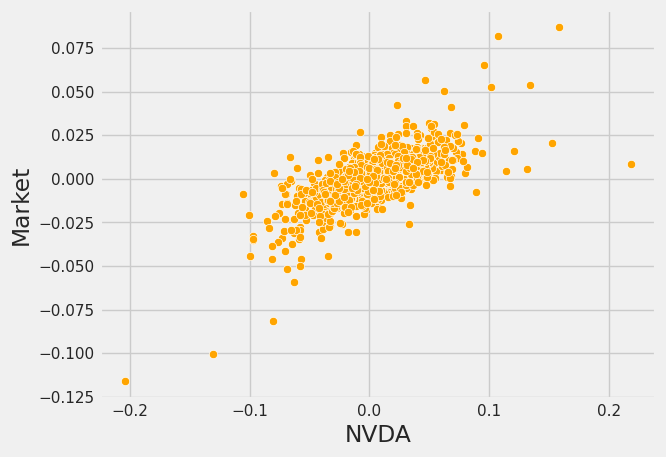

In [154]:
sns.scatterplot(y = 'Market', x = 'NVDA', data = data, color = 'ORANGE')
plt.show()

<Axes: xlabel='Market', ylabel='NVDA'>

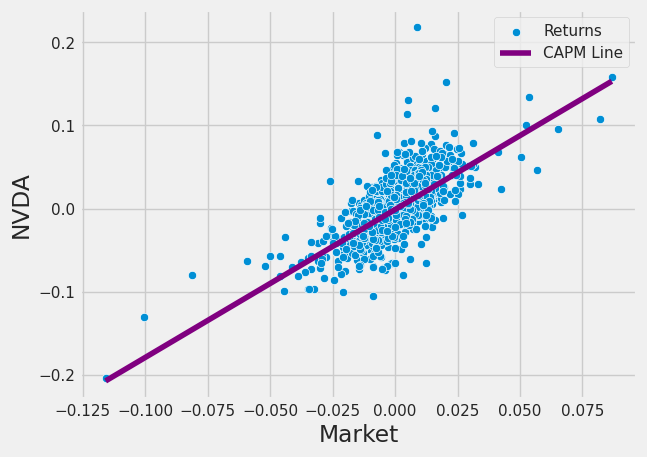

In [155]:
sns.scatterplot(y = 'NVDA', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_NVDA, color = 'PURPLE', label = 'CAPM Line')

In [156]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','NVDA']].cov() *252
cov_NVDA_market = cov.iloc[0,1]
cov_NVDA_market
market_var = data['Market'].var()*252
market_var

NVDA_beta_annual = cov_NVDA_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',NVDA_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
NVDA_capm_return = rf + NVDA_beta_annual*riskpremium

print(f"The annualized CAPM return of NVDA is {NVDA_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.781613744921576
The annualized CAPM return of NVDA is 21.95%


In [158]:
sharperatio = (rm-rf)/(data['NVDA'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.2041
